In [2]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from ipywidgets import interact_manual

# Data Cleaning -

### Loading the data set


In [3]:
d = pd.read_csv(r"C:\Users\macha\Batch_427_A\Project_427A\smart_watch.csv")
d

,brand,model,current_price,original_price,features,color,size,display_size,offer,deals
0,GOBOULT,Drift+,999,"8,499","1.85"" ,BT Calling, 500Nits Brightness, 1...",Jet Black Strap,Free Size,1.85 inch,88,Super Deals
1,Fire-Boltt,Legacy,"1,899","21,000","36.3mm (1.43"") AMOLED Display, Blueto...",Grey S Strap,Free Size,36.3 mm,90,Upto ₹300 Off on Exchange
2,alt,OG,799,"14,999",Supreme 1.96'' AMOLED Single Chip Calling 120 ...,Black Strap,Regular,1.96 inch,94,Super Deals
3,Fire-Boltt,Ninja,999,"9,999",Calling Pro Plus 46.5mm (1.83) Display...,Cinnamon Slate Strap,Free Size,46.5 mm,90,Super Deals
4,Fire-Boltt,Rise,"1,099","11,999","Bluetooth Calling 47mm (1.85), Metal Bo...",Black Strap,Free Size,47 mm,90,Super Deals
...,...,...,...,...,...,...,...,...,...,...
555,GameSir,I8,670,"1,999",Pink-A1 Full Screen Touch Watch Specially Ma...,Pink Strap,1.75 Inch Full Screen Display,1.83 inch,66,Super Deals
556,GOBOULT,Drift+,999,"8,499","1.85"" ,BT Calling, 500Nits Brightness, 1...",Black Coffee Strap,Free Size,1.83 inch,88,Super Deals
557,GameSir,I8,674,"2,999",Pro Smart Watch Series 8 with multiple Featu...,Black Strap,1.75 Inch Full Screen Display,1.38 inch,77,Bank Offer
558,Cellecor,"1.91""",799,"3,999",HD Display | 600 NITS | BT-Calling | AI ...,GARNISH/DARK GREY Strap,Free Size,1.69 inch,80,Lowest price in the year


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           560 non-null    object
 1   model           560 non-null    object
 2   current_price   560 non-null    object
 3   original_price  560 non-null    object
 4   features        560 non-null    object
 5   color           560 non-null    object
 6   size            560 non-null    object
 7   display_size    420 non-null    object
 8   offer           560 non-null    int64 
 9   deals           560 non-null    object
dtypes: int64(1), object(9)
memory usage: 43.9+ KB


In [5]:
d['current_price'] = d['current_price'].str.replace(",","").astype('float')
d['current_price'] 

0       999.0
1      1899.0
2       799.0
3       999.0
4      1099.0
        ...  
555     670.0
556     999.0
557     674.0
558     799.0
559     693.0
Name: current_price, Length: 560, dtype: float64

In [6]:
d['original_price'] = d['original_price'].str.replace(",","").astype('float')
d['original_price']

0       8499.0
1      21000.0
2      14999.0
3       9999.0
4      11999.0
        ...   
555     1999.0
556     8499.0
557     2999.0
558     3999.0
559     2999.0
Name: original_price, Length: 560, dtype: float64

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           560 non-null    object 
 1   model           560 non-null    object 
 2   current_price   560 non-null    float64
 3   original_price  560 non-null    float64
 4   features        560 non-null    object 
 5   color           560 non-null    object 
 6   size            560 non-null    object 
 7   display_size    420 non-null    object 
 8   offer           560 non-null    int64  
 9   deals           560 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 43.9+ KB


In [8]:
d['size'].value_counts()

Free Size                                                                           423
Regular                                                                              70
1.39"                                                                                12
1.39                                                                                 12
1.75 Inch Full Screen Display                                                        10
One Size                                                                              5
Small                                                                                 3
Free size                                                                             3
Regular Size                                                                          2
Large                                                                                 2
2.01 Inch Full Screen Display                                                         2
Medium                          

In [9]:
# Function to clean and categorize size
def clean_size(value):
    # Convert to string and lowercase for uniform processing
    s = str(value).strip().lower()

    # Step 1: Normalize common words and variations
    replacements = {
        'freesize': 'free size',
        'free size': 'free size',
        'onesize': 'free size',
        'one size': 'free size',
        '"free size elegant women\'s smartwatch with fitness and fashion & stylish design"': 'free size',
        'regular size': 'regular',
        'for regular wear': 'regular',
        '1.39"': '1.39'
    }

    if s in replacements:
        s = replacements[s]

    # Step 2: Convert abbreviations
    if s == 'm':
        return 'medium'
    if s == 'l':
        return 'large'

    # Step 3: Keep predefined categories as-is
    if s in ['free size', 'regular', 'small', 'medium', 'large']:
        return s

    # Step 4: Extract numeric value (if any)
    match = re.search(r'[\d.]+', s)
    if match:
        num = float(match.group())

        # If the number is in millimeters (>10), convert to inches
        if num > 10:
            num = num / 25.4

        # Step 5: Categorize numeric size into [medium, large, free size]
        if num <= 1.7:             # small display/screen
            return 'medium'
        elif 1.7 < num <= 1.9:     # moderate size
            return 'large'
        elif num > 1.9:            # large/full screen size
            return 'free size'
        else:
            return 'regular'

    # Step 6: If no number or known keyword found
    return 'regular'


In [10]:
d['size'] = d['size'].apply(clean_size)

d['size'] = d['size'].astype('category')

d['size'].value_counts()

free size    438
regular       74
medium        28
large         17
small          3
Name: size, dtype: int64

In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   brand           560 non-null    object  
 1   model           560 non-null    object  
 2   current_price   560 non-null    float64 
 3   original_price  560 non-null    float64 
 4   features        560 non-null    object  
 5   color           560 non-null    object  
 6   size            560 non-null    category
 7   display_size    420 non-null    object  
 8   offer           560 non-null    int64   
 9   deals           560 non-null    object  
dtypes: category(1), float64(2), int64(1), object(6)
memory usage: 40.3+ KB


In [12]:
d['display_size'].value_counts()

1.85 inch    42
51.3 mm      42
47 mm        42
1.8 inch     42
1.69 inch    28
1.83 inch    28
2.01 inch    28
35.3 mm      28
1.96 inch    28
36.3 mm      14
1.43 inch    14
54.1 mm      14
1.39 inch    14
46.5 mm      14
33.02 mm     14
1.81 inch    14
1.38 inch    14
Name: display_size, dtype: int64

In [13]:
l = []
for i in d['display_size']:
    i = str(i).strip().lower()
    if 'mm' in i:
        x = i.split(" ")[0]
        l.append(round(float(x)/25.4,2))
    else:
        x = i.split(" ")[0]
        l.append(round(float(x),2))
l

[1.85,
 1.43,
 1.96,
 1.83,
 1.85,
 nan,
 nan,
 1.8,
 1.8,
 nan,
 1.85,
 1.43,
 nan,
 1.69,
 1.85,
 nan,
 1.85,
 nan,
 1.39,
 nan,
 2.01,
 2.01,
 1.39,
 1.85,
 nan,
 2.13,
 1.39,
 2.02,
 nan,
 1.3,
 2.02,
 2.02,
 1.81,
 1.8,
 nan,
 1.83,
 1.83,
 1.38,
 1.69,
 1.96,
 1.85,
 1.43,
 1.96,
 1.83,
 1.85,
 nan,
 nan,
 1.8,
 1.8,
 nan,
 1.85,
 1.43,
 nan,
 1.69,
 1.85,
 nan,
 1.85,
 nan,
 1.39,
 nan,
 2.01,
 2.01,
 1.39,
 1.85,
 nan,
 2.13,
 1.39,
 2.02,
 nan,
 1.3,
 2.02,
 2.02,
 1.81,
 1.8,
 nan,
 1.83,
 1.83,
 1.38,
 1.69,
 1.96,
 1.85,
 1.43,
 1.96,
 1.83,
 1.85,
 nan,
 nan,
 1.8,
 1.8,
 nan,
 1.85,
 1.43,
 nan,
 1.69,
 1.85,
 nan,
 1.85,
 nan,
 1.39,
 nan,
 2.01,
 2.01,
 1.39,
 1.85,
 nan,
 2.13,
 1.39,
 2.02,
 nan,
 1.3,
 2.02,
 2.02,
 1.81,
 1.8,
 nan,
 1.83,
 1.83,
 1.38,
 1.69,
 1.96,
 1.85,
 1.43,
 1.96,
 1.83,
 1.85,
 nan,
 nan,
 1.8,
 1.8,
 nan,
 1.85,
 1.43,
 nan,
 1.69,
 1.85,
 nan,
 1.85,
 nan,
 1.39,
 nan,
 2.01,
 2.01,
 1.39,
 1.85,
 nan,
 2.13,
 1.39,
 2.02,
 nan,
 1.3,
 2.0

In [14]:
len(l)

560

In [15]:
d['display_size'] = l

In [16]:
d['display_size'].value_counts()

1.85    84
1.83    42
1.80    42
1.39    42
2.02    42
1.43    28
1.96    28
1.69    28
2.01    28
2.13    14
1.30    14
1.81    14
1.38    14
Name: display_size, dtype: int64

In [17]:
d['deals'].value_counts()

Super Deals                  215
Bank Offer                   172
Upto ₹300 Off on Exchange     80
Hot Deal                      34
Lowest price since launch     34
Lowest price in the year      21
Only 1 left                    3
Only 5 left                    1
Name: deals, dtype: int64

In [18]:
def clean_deals(value):
    s = str(value).strip().lower()
    if 'super' in s:
        return 'Super Deal'
    elif 'bank' in s:
        return 'Bank Offer'
    elif 'exchange' in s:
        return 'Exchange Offer'
    elif 'lowest price' in s:
        return 'Lowest Price'
    elif 'hot' in s:
        return 'Hot Deal'
    elif 'only' in s:
        return 'Limited Stock'
    else:
        return 'Other'

d['deals'] = d['deals'].apply(clean_deals)

d['deals'] = d['deals'].astype('category')

# Check cleaned values
d['deals'].value_counts()

Super Deal        215
Bank Offer        172
Exchange Offer     80
Lowest Price       55
Hot Deal           34
Limited Stock       4
Name: deals, dtype: int64

In [19]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   brand           560 non-null    object  
 1   model           560 non-null    object  
 2   current_price   560 non-null    float64 
 3   original_price  560 non-null    float64 
 4   features        560 non-null    object  
 5   color           560 non-null    object  
 6   size            560 non-null    category
 7   display_size    420 non-null    float64 
 8   offer           560 non-null    int64   
 9   deals           560 non-null    category
dtypes: category(2), float64(3), int64(1), object(4)
memory usage: 36.6+ KB


In [20]:
d.columns

Index(['brand', 'model', 'current_price', 'original_price', 'features',
       'color', 'size', 'display_size', 'offer', 'deals'],
      dtype='object')

In [21]:
d.columns = d.columns.str.replace('offer','offer(%)').str.replace('display_size','display_size(inch)')
d.columns = d.columns.str.replace('current_price','price').str.replace('original_price','MRP')


In [22]:
d.isnull().sum()

brand                   0
model                   0
price                   0
MRP                     0
features                0
color                   0
size                    0
display_size(inch)    140
offer(%)                0
deals                   0
dtype: int64

In [23]:
d['display_size(inch)'].describe()

count    420.000000
mean       1.767333
std        0.231792
min        1.300000
25%        1.690000
50%        1.830000
75%        1.960000
max        2.130000
Name: display_size(inch), dtype: float64

<Axes: xlabel='display_size(inch)'>

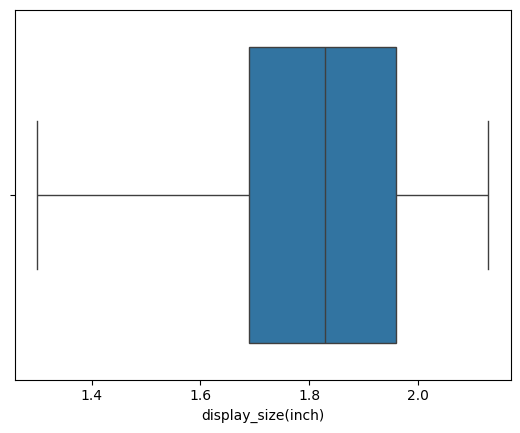

In [24]:
sns.boxplot(x = d['display_size(inch)'])

In [25]:
d['display_size(inch)'] = d['display_size(inch)'].fillna(d['display_size(inch)'].mean())

In [26]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   brand               560 non-null    object  
 1   model               560 non-null    object  
 2   price               560 non-null    float64 
 3   MRP                 560 non-null    float64 
 4   features            560 non-null    object  
 5   color               560 non-null    object  
 6   size                560 non-null    category
 7   display_size(inch)  560 non-null    float64 
 8   offer(%)            560 non-null    int64   
 9   deals               560 non-null    category
dtypes: category(2), float64(3), int64(1), object(4)
memory usage: 36.6+ KB


In [27]:
d.duplicated().sum()

168

In [28]:
d = d.drop_duplicates().reset_index(drop=True)

In [29]:
d.duplicated().sum()

0

In [30]:
d

,brand,model,price,MRP,features,color,size,display_size(inch),offer(%),deals
0,GOBOULT,Drift+,999.0,8499.0,"1.85"" ,BT Calling, 500Nits Brightness, 1...",Jet Black Strap,free size,1.850000,88,Super Deal
1,Fire-Boltt,Legacy,1899.0,21000.0,"36.3mm (1.43"") AMOLED Display, Blueto...",Grey S Strap,free size,1.430000,90,Exchange Offer
2,alt,OG,799.0,14999.0,Supreme 1.96'' AMOLED Single Chip Calling 120 ...,Black Strap,regular,1.960000,94,Super Deal
3,Fire-Boltt,Ninja,999.0,9999.0,Calling Pro Plus 46.5mm (1.83) Display...,Cinnamon Slate Strap,free size,1.830000,90,Super Deal
4,Fire-Boltt,Rise,1099.0,11999.0,"Bluetooth Calling 47mm (1.85), Metal Bo...",Black Strap,free size,1.850000,90,Super Deal
...,...,...,...,...,...,...,...,...,...,...
387,REDMI,Watch,2699.0,4999.0,"5 Active BT Calling 3 mic,2""HD Screen,18 da...",Active Midnight Black Strap,free size,1.800000,46,Exchange Offer
388,Noise,Origin,5000.0,9999.0,"1.46"" AMOLED Display with All New Nebula U...",Classic Black Strap,regular,1.767333,49,Lowest Price
389,GameSir,I8,670.0,1999.0,Pink-A1 Full Screen Touch Watch Specially Ma...,Pink Strap,large,1.830000,66,Super Deal
390,Cellecor,"1.91""",799.0,3999.0,HD Display | 600 NITS | BT-Calling | AI ...,GARNISH/DARK GREY Strap,free size,1.690000,80,Lowest Price


 # ----------------Data Cleaning completed----------------

In [31]:
d.to_csv('smart_watch(cleaned_data.csv', index = False)

In [32]:
dd = d

In [33]:
dd

,brand,model,price,MRP,features,color,size,display_size(inch),offer(%),deals
0,GOBOULT,Drift+,999.0,8499.0,"1.85"" ,BT Calling, 500Nits Brightness, 1...",Jet Black Strap,free size,1.850000,88,Super Deal
1,Fire-Boltt,Legacy,1899.0,21000.0,"36.3mm (1.43"") AMOLED Display, Blueto...",Grey S Strap,free size,1.430000,90,Exchange Offer
2,alt,OG,799.0,14999.0,Supreme 1.96'' AMOLED Single Chip Calling 120 ...,Black Strap,regular,1.960000,94,Super Deal
3,Fire-Boltt,Ninja,999.0,9999.0,Calling Pro Plus 46.5mm (1.83) Display...,Cinnamon Slate Strap,free size,1.830000,90,Super Deal
4,Fire-Boltt,Rise,1099.0,11999.0,"Bluetooth Calling 47mm (1.85), Metal Bo...",Black Strap,free size,1.850000,90,Super Deal
...,...,...,...,...,...,...,...,...,...,...
387,REDMI,Watch,2699.0,4999.0,"5 Active BT Calling 3 mic,2""HD Screen,18 da...",Active Midnight Black Strap,free size,1.800000,46,Exchange Offer
388,Noise,Origin,5000.0,9999.0,"1.46"" AMOLED Display with All New Nebula U...",Classic Black Strap,regular,1.767333,49,Lowest Price
389,GameSir,I8,670.0,1999.0,Pink-A1 Full Screen Touch Watch Specially Ma...,Pink Strap,large,1.830000,66,Super Deal
390,Cellecor,"1.91""",799.0,3999.0,HD Display | 600 NITS | BT-Calling | AI ...,GARNISH/DARK GREY Strap,free size,1.690000,80,Lowest Price


# Data Analysis


In [34]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   brand               392 non-null    object  
 1   model               392 non-null    object  
 2   price               392 non-null    float64 
 3   MRP                 392 non-null    float64 
 4   features            392 non-null    object  
 5   color               392 non-null    object  
 6   size                392 non-null    category
 7   display_size(inch)  392 non-null    float64 
 8   offer(%)            392 non-null    int64   
 9   deals               392 non-null    category
dtypes: category(2), float64(3), int64(1), object(4)
memory usage: 25.8+ KB


In [35]:
dd.describe()

,price,MRP,display_size(inch),offer(%)
count,392.000000,392.000000,392.000000,392.000000
mean,3947.941327,11068.918367,1.760417,70.647959
std,7998.268198,9472.308993,0.188505,19.944771
min,470.000000,1999.000000,1.300000,8.000000
25%,1199.000000,5999.000000,1.767333,62.000000
50%,1599.000000,7999.000000,1.767333,77.000000
75%,2499.000000,11999.000000,1.850000,87.000000
max,72999.000000,56900.000000,2.130000,94.000000


In [36]:
dd.head()

,brand,model,price,MRP,features,color,size,display_size(inch),offer(%),deals
0,GOBOULT,Drift+,999.0,8499.0,"1.85"" ,BT Calling, 500Nits Brightness, 1...",Jet Black Strap,free size,1.85,88,Super Deal
1,Fire-Boltt,Legacy,1899.0,21000.0,"36.3mm (1.43"") AMOLED Display, Blueto...",Grey S Strap,free size,1.43,90,Exchange Offer
2,alt,OG,799.0,14999.0,Supreme 1.96'' AMOLED Single Chip Calling 120 ...,Black Strap,regular,1.96,94,Super Deal
3,Fire-Boltt,Ninja,999.0,9999.0,Calling Pro Plus 46.5mm (1.83) Display...,Cinnamon Slate Strap,free size,1.83,90,Super Deal
4,Fire-Boltt,Rise,1099.0,11999.0,"Bluetooth Calling 47mm (1.85), Metal Bo...",Black Strap,free size,1.85,90,Super Deal


# Creating new columns

In [37]:
dd['discount_amount'] = dd['MRP'] - dd['price']

dd['discount_category'] = pd.cut(
    dd['offer(%)'],
    bins=[0, 50, 70, 85, 100],
    labels=['Low', 'Medium', 'High', 'Very High']
)

dd['price_category'] = pd.cut(
    dd['price'],
    bins=[0, 2000, 4000, 6000, 10000, dd['price'].max()],
    labels=['Budget', 'Affordable', 'Mid-range', 'Premium', 'Luxury']
)

In [38]:
dd

,brand,model,price,MRP,features,color,size,display_size(inch),offer(%),deals,discount_amount,discount_category,price_category
0,GOBOULT,Drift+,999.0,8499.0,"1.85"" ,BT Calling, 500Nits Brightness, 1...",Jet Black Strap,free size,1.850000,88,Super Deal,7500.0,Very High,Budget
1,Fire-Boltt,Legacy,1899.0,21000.0,"36.3mm (1.43"") AMOLED Display, Blueto...",Grey S Strap,free size,1.430000,90,Exchange Offer,19101.0,Very High,Budget
2,alt,OG,799.0,14999.0,Supreme 1.96'' AMOLED Single Chip Calling 120 ...,Black Strap,regular,1.960000,94,Super Deal,14200.0,Very High,Budget
3,Fire-Boltt,Ninja,999.0,9999.0,Calling Pro Plus 46.5mm (1.83) Display...,Cinnamon Slate Strap,free size,1.830000,90,Super Deal,9000.0,Very High,Budget
4,Fire-Boltt,Rise,1099.0,11999.0,"Bluetooth Calling 47mm (1.85), Metal Bo...",Black Strap,free size,1.850000,90,Super Deal,10900.0,Very High,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,REDMI,Watch,2699.0,4999.0,"5 Active BT Calling 3 mic,2""HD Screen,18 da...",Active Midnight Black Strap,free size,1.800000,46,Exchange Offer,2300.0,Low,Affordable
388,Noise,Origin,5000.0,9999.0,"1.46"" AMOLED Display with All New Nebula U...",Classic Black Strap,regular,1.767333,49,Lowest Price,4999.0,Low,Mid-range
389,GameSir,I8,670.0,1999.0,Pink-A1 Full Screen Touch Watch Specially Ma...,Pink Strap,large,1.830000,66,Super Deal,1329.0,Medium,Budget
390,Cellecor,"1.91""",799.0,3999.0,HD Display | 600 NITS | BT-Calling | AI ...,GARNISH/DARK GREY Strap,free size,1.690000,80,Lowest Price,3200.0,High,Budget


### univarient Analysis

@interact(col=list(dd.select_dtypes(include=['object', 'category']).columns))
def univariate_categorical(col):
    plt.figure(figsize=(8,4))
    sns.countplot(data=dd, x=col, palette='pastel')
    plt.title(f'Count of {col}', fontsize=13)
    plt.xticks(rotation=45)
    plt.show()

#### 1.  what are the average price, mrp, offer, display_size

In [39]:
dd.describe()

,price,MRP,display_size(inch),offer(%),discount_amount
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3947.941327,11068.918367,1.760417,70.647959,7120.977041
std,7998.268198,9472.308993,0.188505,19.944771,6180.883685
min,470.000000,1999.000000,1.300000,8.000000,-65009.000000
25%,1199.000000,5999.000000,1.767333,62.000000,3500.000000
50%,1599.000000,7999.000000,1.767333,77.000000,5925.000000
75%,2499.000000,11999.000000,1.850000,87.000000,8800.000000
max,72999.000000,56900.000000,2.130000,94.000000,30050.000000


###### Insight:

- Average price (mean): around ₹3,000–₹5,000

- Average MRP: around ₹10,000–₹11,000

- Average offer/discount: ~70–75%
- Average display_size : ~1.76 inch

###### Interpretation:

Smartwatches typically sell at 70–80% discounts, showing heavy reliance on promotional pricing to boost sales.

#### 2. outlier's in price

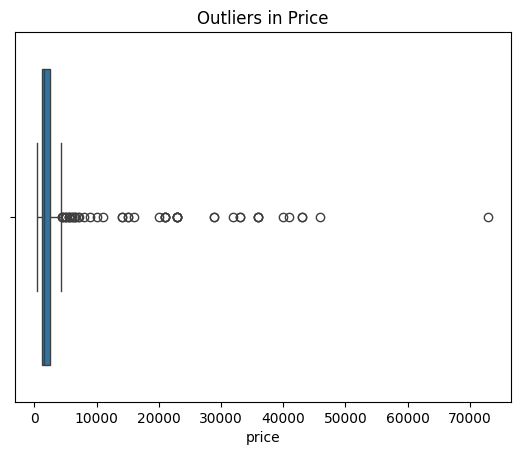

In [40]:
sns.boxplot(x = dd['price'])
plt.title('Outliers in Price')
plt.show()

- Some watches might show prices far above ₹10,000

#### 3. 

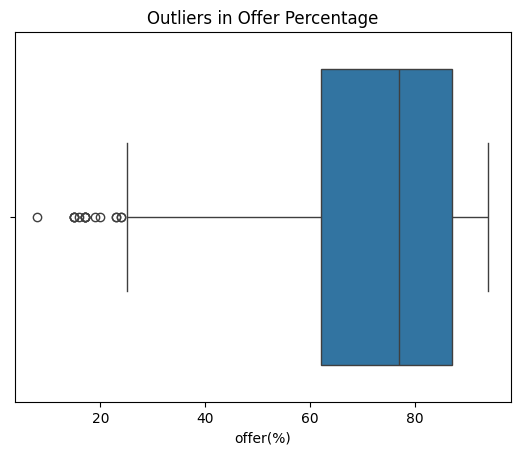

In [41]:
sns.boxplot(x=dd['offer(%)'])
plt.title('Outliers in Offer Percentage')
plt.show()

- Offer(%) is mostly between 60–80%, showing consistent heavy discounting.
###### Interpretation:
Smartwatches are promoted with large discounts to attract buyers and compete in price-sensitive segments.

#### 4. 

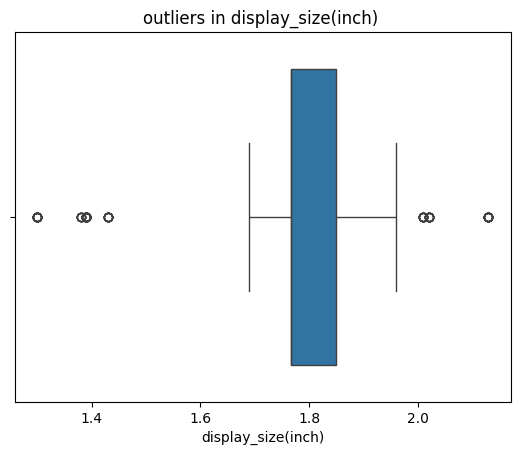

In [42]:
sns.boxplot(x=dd['display_size(inch)'])
plt.title('outliers in display_size(inch) ')
plt.show()

- Display size clusters around 1.7–1.9 inches, meaning most watches are standard-sized.

#### 5. 

In [43]:
dd['deals'].value_counts()

Super Deal        135
Bank Offer        120
Exchange Offer     72
Lowest Price       46
Hot Deal           15
Limited Stock       4
Name: deals, dtype: int64

###### Insight:

- Most common deal type → likely "Super Deal" or "Bank Offer" (as you saw earlier).

- These are the offers brands use most frequently to attract buyers.

###### Interpretation:

“Super Deal” and “Bank Offer” appear most often, showing that price-based and bank-related promotions are the key sales strategies in the smartwatch market.

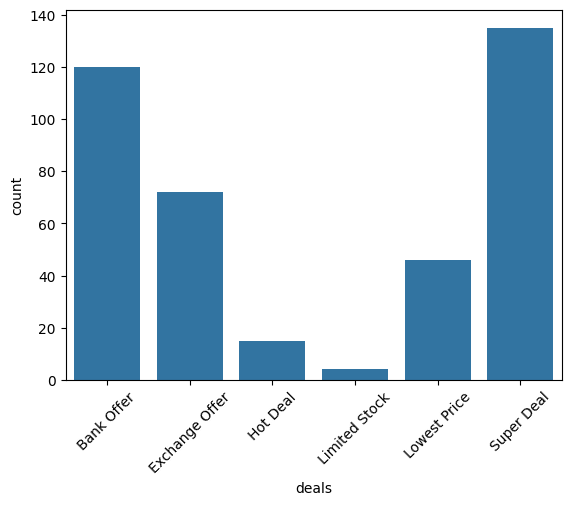

In [44]:
sns.countplot(x='deals', data=dd)
plt.xticks(rotation=45)
plt.show()

#### 6.

C:\Users\macha\AppData\Local\Temp\ipykernel_10264\3257734177.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='size', data=dd, palette='Set2')


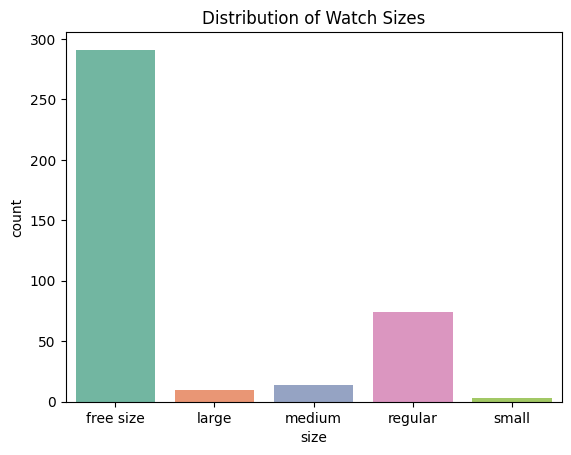

In [45]:
sns.countplot(x='size', data=dd, palette='Set2')
plt.title('Distribution of Watch Sizes')
plt.show()


- The majority of smartwatches are free-sized, designed for universal wrist fitting.

#### Univariate Key Insights Summary
- Feature	Key Insight
- Price	--> Avg ₹3,000–₹5,000; few expensive outliers
- MmRP	--> Avg ₹10,000–₹11,000
- Offer(%)--> 	Avg 70–80% discount — highly promotional market
- Display Size --> 	Mostly 1.7–1.9 inches (standard size)
- Deals --> 	Super Deals & Bank Offers dominate
- Size -->	Free-size models are most common

#### 7. To identify which brands dominate the smartwatch market.

In [46]:
dd['brand'].value_counts().head(10)

Fire-Boltt    84
Noise         66
boAt          50
Fastrack      46
GOBOULT       45
Apple         16
GameSir       11
Cellecor      10
REDMI          7
Samsung        7
Name: brand, dtype: int64

###### Insight :
Brands like “Noise”, “Fire-Boltt”, and “boAt” appear most frequently.
###### Interpretation:
Market is dominated by affordable Indian smartwatch brands — showing the focus on budget-friendly smartwatches.

#### 8. To know which price range has the most smartwatches.

C:\Users\macha\AppData\Local\Temp\ipykernel_10264\2881784852.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_category', data=dd, palette='pastel')


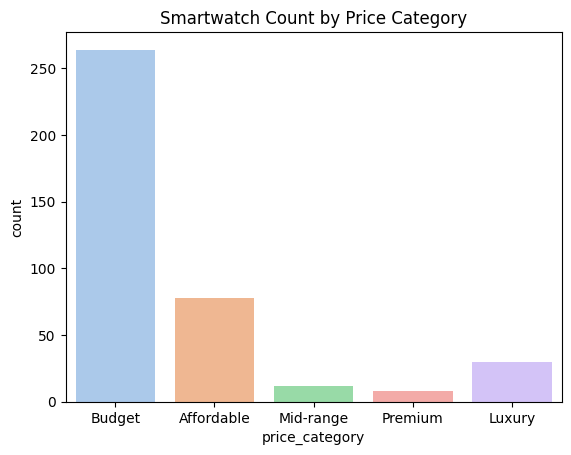

In [47]:
sns.countplot(x='price_category', data=dd, palette='pastel')
plt.title('Smartwatch Count by Price Category')
plt.show()


- “Affordable” and “Mid-range” watches are the most common.

#### 9. To check how many products fall under high or low discount offers.

C:\Users\macha\AppData\Local\Temp\ipykernel_10264\1421550653.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='discount_category', data=dd, palette='cool')


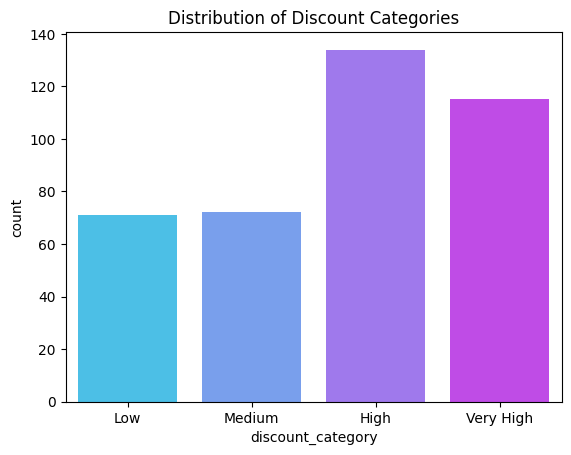

In [48]:
sns.countplot(x='discount_category', data=dd, palette='cool')
plt.title('Distribution of Discount Categories')
plt.show()


- Majority fall under High and Very High discounts (above 70%).
###### Interpretation:
The market heavily depends on discount-based marketing strategies.

#### 10. To identify which models are repeated or popular.

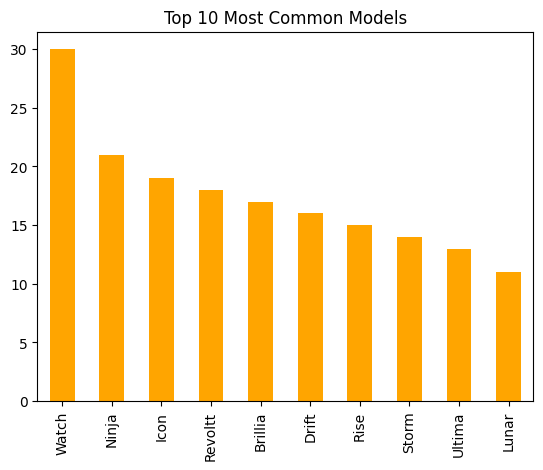

In [49]:
top_models = dd['model'].value_counts().head(10)
top_models.plot(kind='bar', color='orange')
plt.title('Top 10 Most Common Models')
plt.show()



 - Few models appear multiple times, likely due to different variants or sellers.
###### Interpretation:
Popular models have multiple listings, showing high demand and variety.

#### 11. Which brands dominate the smartwatch market in terms of product listings?

C:\Users\macha\AppData\Local\Temp\ipykernel_10264\2004431772.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='brand', data=dd, order=dd['brand'].value_counts().head(10).index, palette='coolwarm')


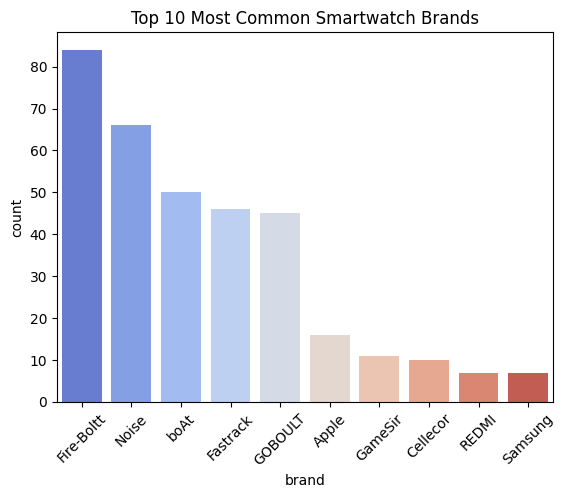

In [63]:
sns.countplot(x='brand', data=dd, order=dd['brand'].value_counts().head(10).index, palette='coolwarm')
plt.title('Top 10 Most Common Smartwatch Brands')
plt.xticks(rotation=45)
plt.show()


###### Insights:

Brands like Noise, Fire-Boltt, and boAt have the highest number of listings.

Premium brands like Apple and Samsung have fewer listings but higher price segments.

###### Interpretation:

The Indian smartwatch market is dominated by affordable brands, showing that customers prioritize budget and value-for-money products over luxury models.

#### 12. How do average prices vary among the top smartwatch brands?

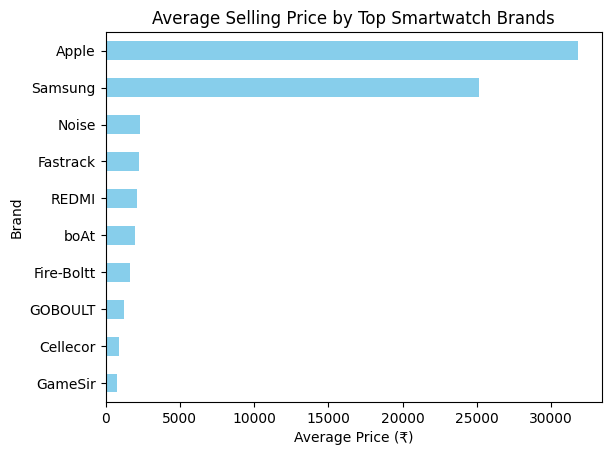

In [65]:
# Select top 10 brands based on frequency
top_brands = dd['brand'].value_counts().head(10).index

# Calculate average price only for top brands
brand_price = dd[dd['brand'].isin(top_brands)].groupby('brand')['price'].mean().sort_values(ascending=True)

# Plot horizontal bar chart
brand_price.plot(kind='barh', color='skyblue')
plt.title('Average Selling Price by Top Smartwatch Brands')
plt.xlabel('Average Price (₹)')
plt.ylabel('Brand')
plt.show()


# Bivarient Analysis

#### 1. how discounts affect selling price

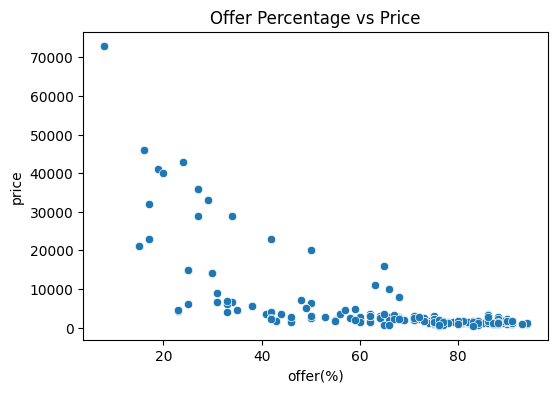

In [50]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='offer(%)', y='price', data=dd)
plt.title('Offer Percentage vs Price')
plt.show()


- As offer(%) increases, price generally decreases.
- There is a negative correlation between offer and price — higher discount → lower selling price.

#### 2. MRP vs Price

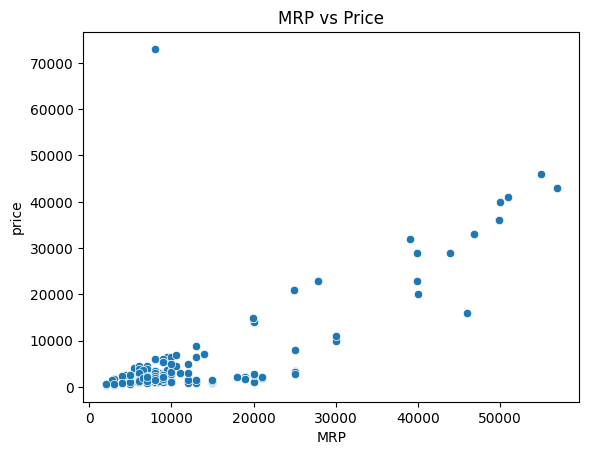

In [51]:
sns.scatterplot(x='MRP', y='price', data=dd)
plt.title('MRP vs Price')
plt.show()


- Positive relationship: as MRP increases, price also increases.

- Some data points show large gaps (indicating heavy discounts).

- Helps confirm that price data is consistent with MRP values.

#### 3. Deal Type vs Offer(%) 
- which deal types provide better discounts.

C:\Users\macha\AppData\Local\Temp\ipykernel_10264\3517041899.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deals', y='offer(%)', data=dd, palette='pastel')


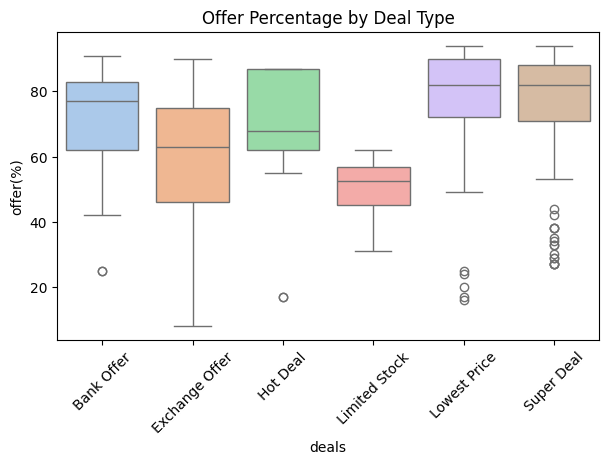

In [52]:
plt.figure(figsize=(7,4))
sns.boxplot(x='deals', y='offer(%)', data=dd, palette='pastel')
plt.xticks(rotation=45)
plt.title('Offer Percentage by Deal Type')
plt.show()


C:\Users\macha\AppData\Local\Temp\ipykernel_10264\2861575276.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_offer.index, y=avg_offer.values, palette='pastel')


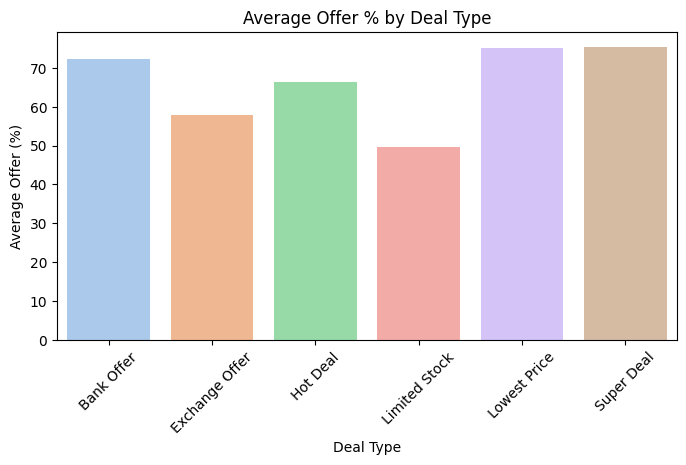

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average offer for each deal type
avg_offer = dd.groupby('deals')['offer(%)'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,4))
sns.barplot(x=avg_offer.index, y=avg_offer.values, palette='pastel')
plt.title('Average Offer % by Deal Type')
plt.ylabel('Average Offer (%)')
plt.xlabel('Deal Type')
plt.xticks(rotation=45)
plt.show()


C:\Users\macha\AppData\Local\Temp\ipykernel_10264\3471020290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='deals', y='offer(%)', data=dd, palette='pastel')


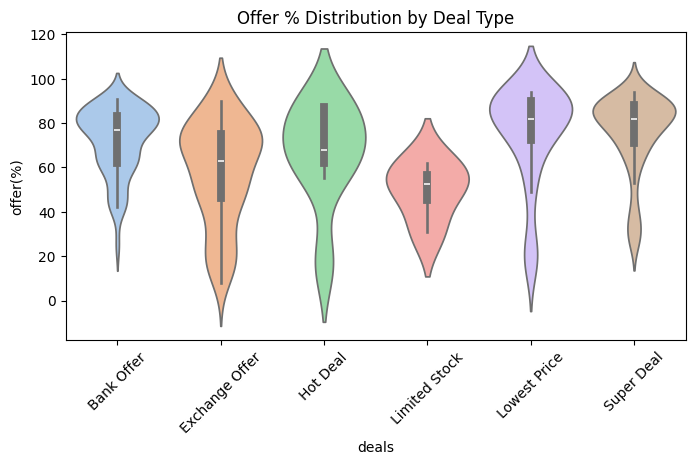

In [67]:
plt.figure(figsize=(8,4))
sns.violinplot(x='deals', y='offer(%)', data=dd, palette='pastel')
plt.title('Offer % Distribution by Deal Type')
plt.xticks(rotation=45)
plt.show()


- Super Deal and Bank Offer categories usually have higher offers (70–85%).

- Exchange and Hot Deal types show moderate discounts.

- Indicates that marketing is heavily discount-driven for specific deal tags.

#### 4. Size vs Price

C:\Users\macha\AppData\Local\Temp\ipykernel_10264\1636136136.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='size', y='price', data=dd, palette='Set2')


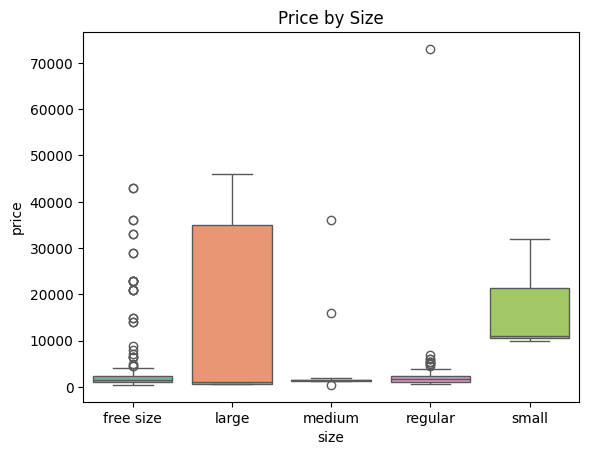

In [53]:
sns.boxplot(x='size', y='price', data=dd, palette='Set2')
plt.title('Price by Size')
plt.show()


C:\Users\macha\AppData\Local\Temp\ipykernel_10264\1228406354.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='Set2')


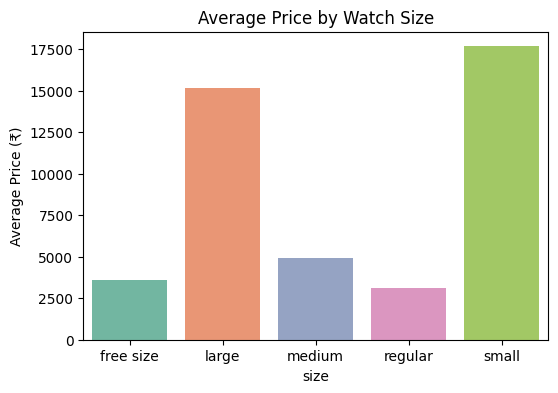

In [71]:
avg_price = dd.groupby('size')['price'].mean().sort_values()
plt.figure(figsize=(6,4))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='Set2')
plt.title('Average Price by Watch Size')
plt.ylabel('Average Price (₹)')
plt.show()


###### Insights:

- Large and free-size watches tend to have higher prices.

- Medium/Regular sizes fall in the mid-range segment.
- Size doesn’t affect price much

#### 5. Correlation Heatmap (for numeric columns)

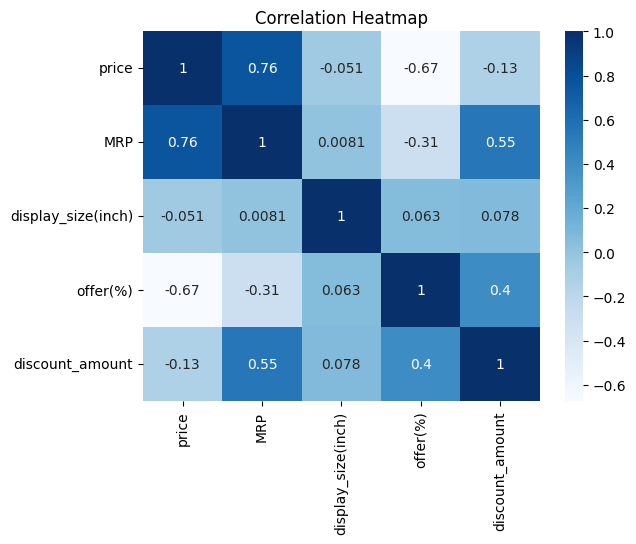

In [54]:
sns.heatmap(dd.select_dtypes('number').corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


- MRP and price → strongly positive correlation (~0.85–0.9): higher MRP → higher selling price.

- offer(%) and price → negative correlation (~-0.6): higher discount → lower price.

#### 6. To compare average prices across brands.

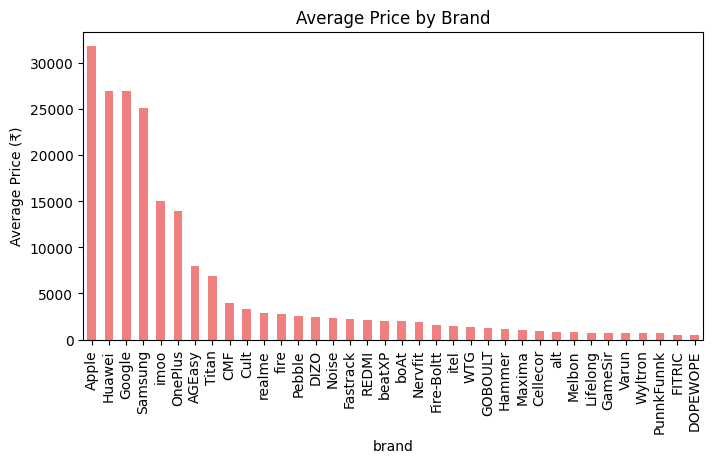

In [55]:
brand_price = dd.groupby('brand')['price'].mean().sort_values(ascending=False)
brand_price.plot(kind='bar', figsize=(8,4), color='lightcoral')
plt.title('Average Price by Brand')
plt.ylabel('Average Price (₹)')
plt.show()


###### Insights:

Brands like Apple, Huawei, Google, Samsung have higher prices, while others are mid-range.

###### Interpretation:
Shows brand-based market segmentation — premium vs affordable brands.

#### 7. To check which price range gets bigger discounts.

C:\Users\macha\AppData\Local\Temp\ipykernel_10264\1097219529.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_category', y='offer(%)', data=dd, palette='Set2')


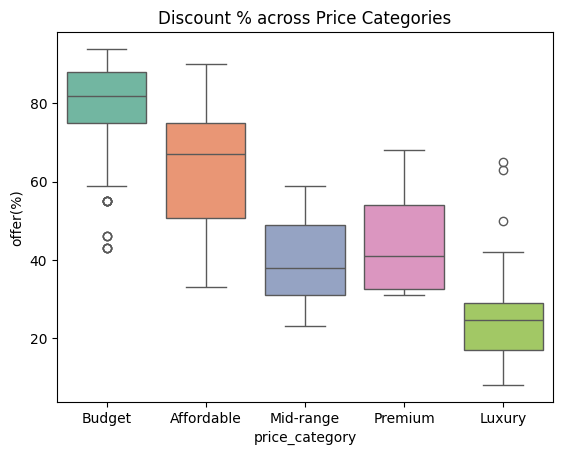

In [56]:
sns.boxplot(x='price_category', y='offer(%)', data=dd, palette='Set2')
plt.title('Discount % across Price Categories')
plt.show()


###### Insights:

- Budget and Affordable watches have the highest discounts.

- Premium watches have smaller offers.

###### Interpretation:
Cheaper products are discounted heavily to increase sales; premium ones maintain value.

#### 8. To find which brands offer more discounts.

C:\Users\macha\AppData\Local\Temp\ipykernel_10264\2384313429.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='discount_amount', data=dd[dd['brand'].isin(top10)], palette='Set3')


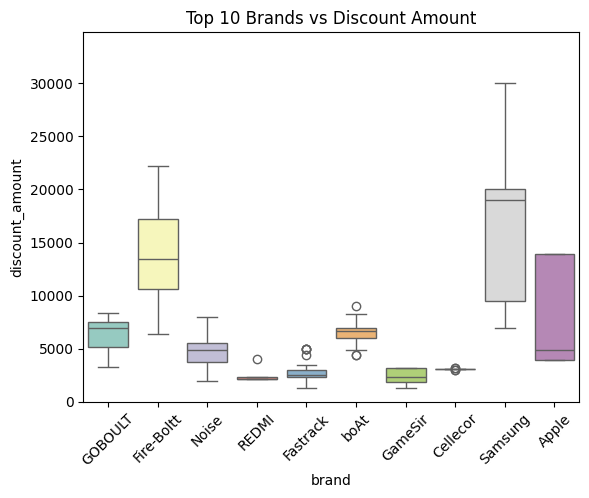

In [57]:
top10 = dd['brand'].value_counts().head(10).index
sns.boxplot(x='brand', y='discount_amount', data=dd[dd['brand'].isin(top10)], palette='Set3')
plt.ylim(0)  # Start y-axis from 0
plt.title('Top 10 Brands vs Discount Amount')
plt.xticks(rotation=45)
plt.show()


###### Insights:
Samsung, Fire-Boltt, Apple, GOBOULT frequently offered higher discounts.

###### Interpretation:
Some brands frequently offer higher discounts to attract customers.

###  Multivariate Analysis

#### 1. To see how discount levels vary among brands and price ranges.

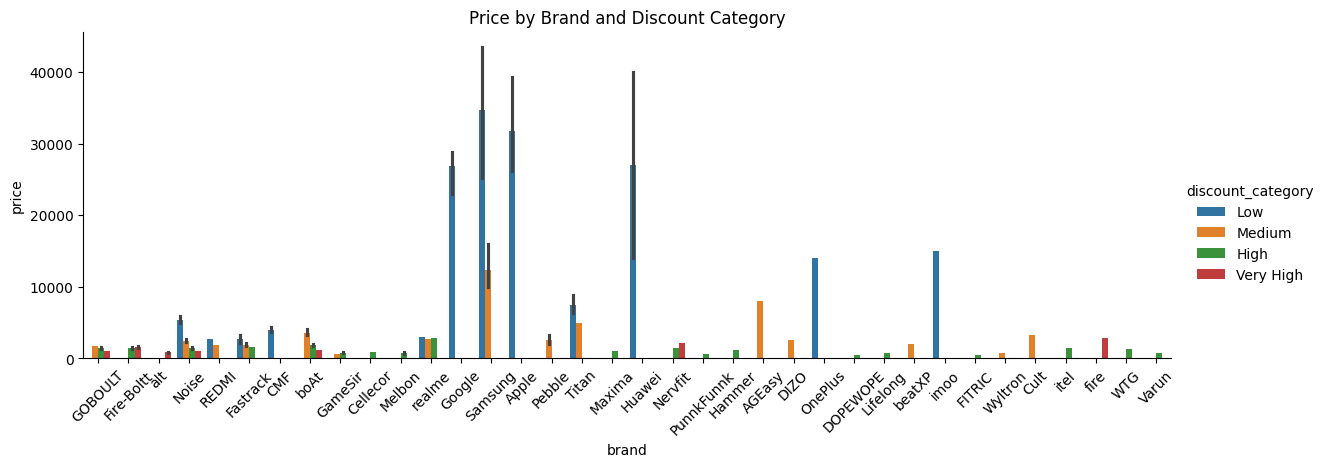

In [58]:
sns.catplot(x='brand', y='price', hue='discount_category', data=dd, kind='bar', height=4, aspect=3)
plt.title('Price by Brand and Discount Category')
plt.xticks(rotation=45)
plt.show()


###### Insights:

Some brands sell high-priced models even with low discounts.

Budget brands depend on high-discount categories.

###### Interpretation:
Premium brands focus on quality, budget brands depend on discounts to attract buyers.

#### 2. To understand how price range and size affect discounts.

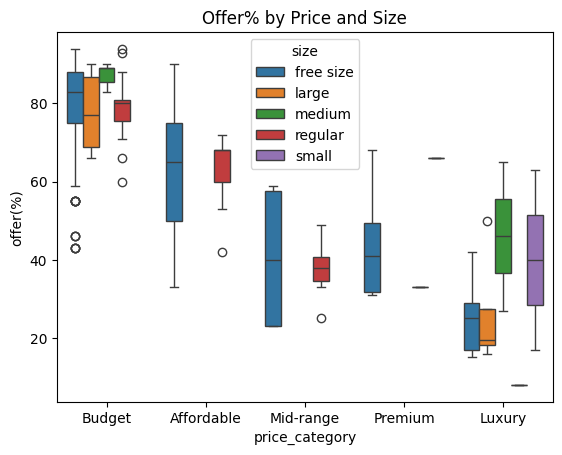

In [59]:
sns.boxplot(x='price_category', y='offer(%)', hue='size', data=dd)
plt.title('Offer% by Price and Size')
plt.show()


###### Insights:

Budget category shows highest offers (60–90%) — stores give big discounts on budget smartwatches to attract more buyers.

Affordable and Mid-range watches have moderate offers (40–70%), meaning brands keep balanced pricing and discounts.

Premium and Luxury categories have very low offers (10–30%), as high-end products rarely need discounts to sell.

Free-size watches appear across all price categories — they are the most common and flexible option for users.

Small and medium sizes dominate the luxury range but with low discounts, indicating exclusive models with limited deals.

###### Interpretation:

Offers are inversely related to price level — cheaper products get bigger discounts.

Luxury and premium brands focus on brand value, not discounting, while budget brands focus on sales volume through discounts.

Size doesn’t heavily affect offers, but free-size models are the most promoted through discounts.

#### 3. To see which brands maintain high prices even after discounting.

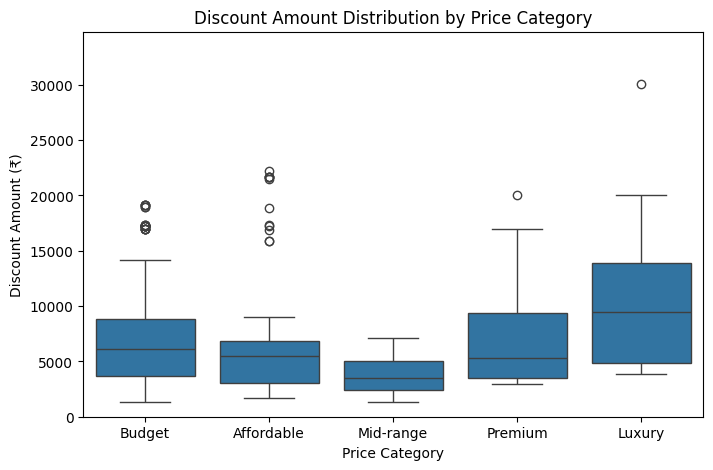

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(x='price_category', y='discount_amount', data=dd)
plt.title('Discount Amount Distribution by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Discount Amount (₹)')
plt.ylim(0)
plt.show()


In [61]:
dd.groupby('brand')['discount_amount'].mean().sort_values(ascending=False).head(10)

brand
fire          17200.000000
AGEasy        17000.000000
Samsung       16435.714286
Google        14303.333333
Fire-Boltt    13685.785714
Nervfit       12758.000000
alt           11178.200000
Huawei         8000.000000
Cult           6700.000000
boAt           6529.280000
Name: discount_amount, dtype: float64

C:\Users\macha\AppData\Local\Temp\ipykernel_10264\3398901953.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_discount.values, y=avg_discount.index, palette='viridis')


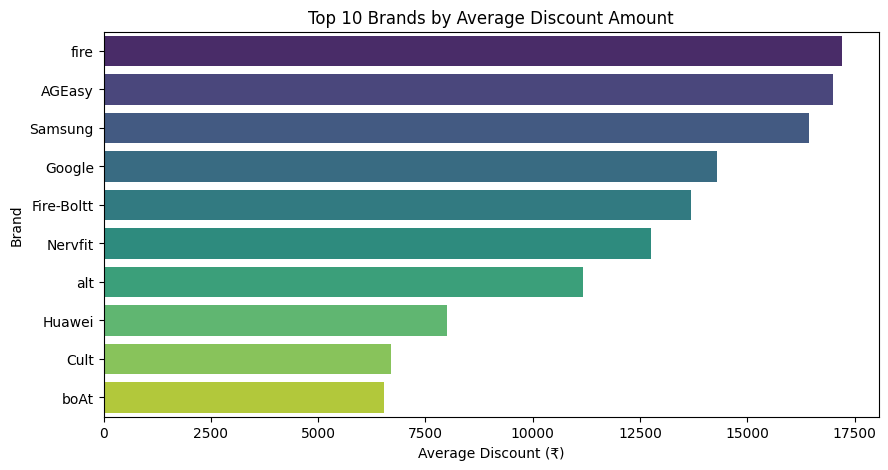

In [62]:
plt.figure(figsize=(10,5))
avg_discount = dd.groupby('brand')['discount_amount'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_discount.values, y=avg_discount.index, palette='viridis')
plt.title('Top 10 Brands by Average Discount Amount')
plt.xlabel('Average Discount (₹)')
plt.ylabel('Brand')
plt.show()


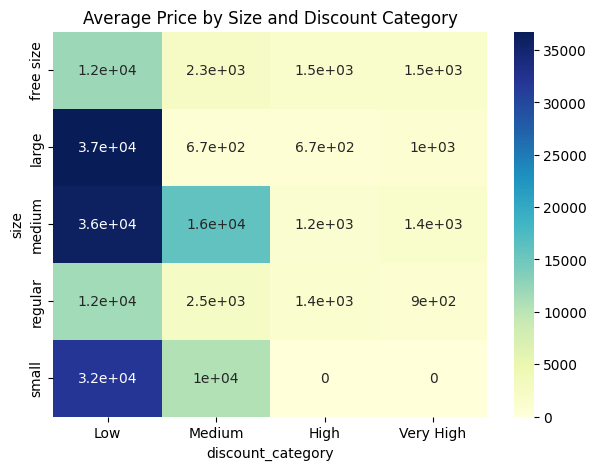

In [78]:
plt.figure(figsize=(7,5))
sns.heatmap(pd.crosstab(dd['size'], dd['discount_category'], values=dd['price'], aggfunc='mean').fillna(0), annot=True, cmap='YlGnBu')
plt.title('Average Price by Size and Discount Category')
plt.show()


In [ ]:
brands = []
models = []
prices_current = []
prices_MRP = []
featuress = []
colors = []
sizes = []
display_sizes = []
offers = []
dealss = []

def extract_display_size(name):
    match = re.search(r'(\d+\.?\d*)\s*(?:mm|\"|\'\')', name)
    return match.group(1) + (" mm" if "mm" in match.group(0) else " inch") if match else None 

for i in range(2,15):
    url = "https://www.flipkart.com/search?q=smart+watch&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="+str(i)
    
    page = requests.get(url)

    page.text
    soup = BeautifulSoup(page.text)
    price = soup.find_all("div",class_ = "hl05eU") 
    x = 0
    for i in price:
        prices_current.append(i.text.split("₹")[1])
        x = x+1
        if x ==40:
            break
    y = 0
    for i in price:
        y =y+1
        prices_MRP.append(i.text.split("₹")[2].split("%")[0][:-2])
        if y == 40:
            break
    z = 0
    for i in price:
        z =z+1
        offers.append(i.text.split("₹")[2].split("%")[0][-2:])
        if z == 40:
    col_size = soup.find_all("div" ,class_="Br9IW+")
    for i in col_size:
        colors.append(i.text.split(",")[0])
    for i in col_size:
        sizes.append(i.text.split(", ")[1])

    fea = soup.find_all("a",class_ = "WKTcLC")    
    for i in fea:
        brands.append(i.text.split(" ")[0])
    for i in fea:
        models.append(i.text.split(" ")[1])
    for i in fea:
        featuress.append(" ".join(i.text.split(" ")[2:]))
    
    for i in features:
        display_sizes.append(extract_display_size(i))

    deal = soup.find_all("div", class_ = "M4DNwV")
    
    for i in deal:
        dealss.append(i.text)
